In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	5
float64		column 3	1
float64		column 4	0
float64		column 5	2
float64		column 6	2
float64		column 7	4
float64		column 8	4
float64		column 9	4
float64		column 10	1
float64		column 11	4
float64		column 12	5


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,396.000000,395.000000,399.000000,400.000000,398.000000,398.000000,396.000000,396.000000,396.000000,399.000000,396.000000,395.000000
mean,-0.087807,0.021163,2.037341,1.900369,1.944013,1.975899,2.031756,1.988090,1.976471,2.022138,1.953749,1.971874
std,2.566141,2.753719,1.133909,1.145649,1.160124,1.142257,1.155733,1.142300,1.143267,1.158222,1.155081,1.190823
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.683635,-0.862860,1.121050,0.943103,0.882807,1.041225,1.012633,1.034350,1.054550,1.031300,0.909745,0.916755
50%,-0.068013,0.008106,2.089000,1.786250,1.933800,2.021800,2.101400,1.979350,2.086750,2.077700,1.895950,1.936400
75%,0.774360,0.872825,2.986300,2.810475,2.982000,2.964175,2.972550,3.027900,2.933775,3.040500,2.965275,3.008450
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

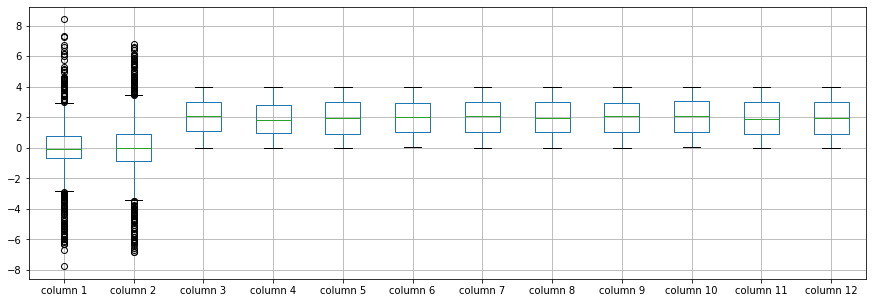

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.087807
column 2     0.021163
column 3     2.037341
column 4     1.900369
column 5     1.944013
column 6     1.975899
column 7     2.031756
column 8     1.988090
column 9     1.976471
column 10    2.022138
column 11    1.953749
column 12    1.971874
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.022797,-0.044975,-0.071137,-0.001022,-0.003667,-0.010046,0.027007,-0.011382,0.049596,0.094078,-0.028722
column 2,0.022797,1.000000,-0.043094,0.037557,-0.077256,-0.075370,0.050869,-0.039345,-0.026207,0.011385,-0.026624,0.058981
column 3,-0.044975,-0.043094,1.000000,0.010276,-0.027866,-0.059074,-0.093211,0.068235,0.109158,-0.033115,-0.076593,-0.000698
column 4,-0.071137,0.037557,0.010276,1.000000,-0.017570,0.095914,0.002386,0.091678,0.009594,0.068720,-0.025778,-0.037640
column 5,-0.001022,-0.077256,-0.027866,-0.017570,1.000000,0.079284,0.031304,0.014913,0.008544,0.031513,0.009872,-0.037338
column 6,-0.003667,-0.075370,-0.059074,0.095914,0.079284,1.000000,-0.004381,0.046204,0.011012,0.005273,0.025356,-0.031618
column 7,-0.010046,0.050869,-0.093211,0.002386,0.031304,-0.004381,1.000000,-0.027655,0.065031,0.039554,0.006294,-0.062172
column 8,0.027007,-0.039345,0.068235,0.091678,0.014913,0.046204,-0.027655,1.000000,0.060649,-0.142698,-0.052013,-0.008469
column 9,-0.011382,-0.026207,0.109158,0.009594,0.008544,0.011012,0.065031,0.060649,1.000000,0.015417,0.017512,0.039427
column 10,0.049596,0.011385,-0.033115,0.068720,0.031513,0.005273,0.039554,-0.142698,0.015417,1.000000,-0.005167,0.024995


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+13,12+13+13,12+13+13+13,12+13+13+13+13,12+13+13+13+13+13,12+13+13+13+13+13+13,12+13+13+13+13+13+13+13,12+13+13+13+13+13+13,12+13+13+13+13+13,12+13+13+13+13,12+13+13+13,12+13+13,12+13,12], vae_layer = False, seed = 13)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.720481719970703
Epoch: 1 , loss: 27.650876998901367
Epoch: 2 , loss: 27.56533477783203
Epoch: 3 , loss: 27.563176727294923
Epoch: 4 , loss: 27.45936653137207
Epoch: 5 , loss: 27.29836181640625
Epoch: 6 , loss: 27.2397420501709
Epoch: 7 , loss: 26.846178283691405
Epoch: 8 , loss: 25.502611541748045
Epoch: 9 , loss: 23.303840255737306
Epoch: 10 , loss: 22.362480926513673
Epoch: 11 , loss: 21.93678108215332
Epoch: 12 , loss: 21.672568359375
Epoch: 13 , loss: 21.165424118041994
Epoch: 14 , loss: 21.060897827148438
Epoch: 15 , loss: 20.88614700317383
Epoch: 16 , loss: 20.78951416015625
Epoch: 17 , loss: 20.652629013061524
Epoch: 18 , loss: 20.392746810913085
Epoch: 19 , loss: 20.28391441345215
Epoch: 20 , loss: 20.375828323364257
Epoch: 21 , loss: 20.036611404418945
Epoch: 22 , loss: 20.324686126708983
Epoch: 23 , loss: 19.961444091796874
Epoch: 24 , loss: 19.901777420043945
Epoch: 25 , loss: 20.12699943

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(12.988526835343965, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.07955026087164292

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NW_1(imp).xlsx", index=False, header=False)